In [1]:
import pandas as pd
data_src_8=pd.read_csv("./src.txt",delimiter="\n",header=None)

### Here 8 means the Sys ID in https://github.com/neulab/REALSumm, download the files in you local drive before running the code

In [2]:
print(data_src_8.head, type(data_src_8), data_src_8)

<bound method NDFrame.head of                                                        0
0      washington ( cnn ) president barack obama says...
1      ( cnn ) the american pharmacists association i...
2      ( cnn ) a man charged with planning the deadly...
3      ( cnn ) by the elation online and in the stree...
4      ( cnn ) did former new england patriot aaron h...
...                                                  ...
11485  luke rockhold staked his claim in new jersey a...
11486  liverpool vice-captain jordan henderson thinks...
11487  protests in melbourne turned violent when anti...
11488  david cameron will today promise extra free ch...
11489  us tourists will have plenty of options for ac...

[11490 rows x 1 columns]> <class 'pandas.core.frame.DataFrame'>                                                        0
0      washington ( cnn ) president barack obama says...
1      ( cnn ) the american pharmacists association i...
2      ( cnn ) a man charged with planning the dea

Human judgment evaluation was done on 100 documents with follwing document IDs from the src.txt

In [3]:
human_eval_doc_id_in_src = [1017, 10586, 11343, 1521, 2736, 3789, 5025, 5272, 5576, 6564, 7174, 7770, 8334, 9325, 9781, 10231, 10595, 11351, 1573, 2748, 3906, 5075, 5334, 5626, 6714, 7397, 7823, 8565, 9393, 9825, 10325, 10680, 11355, 1890, 307, 4043, 5099, 5357, 5635, 6731, 7535, 7910, 8613, 9502, 10368, 10721, 1153, 19, 3152, 4303, 5231, 5420, 5912, 6774, 7547, 8001, 8815, 9555, 10537, 10824, 1173, 1944, 3172, 4315, 5243, 5476, 6048, 6784, 7584, 8054, 8997, 9590, 10542, 11049, 1273, 2065, 3583, 4637, 5244, 5524, 6094, 6976, 7626, 8306, 9086, 9605, 10563, 11264, 1492, 2292, 3621, 4725, 5257, 5558, 6329, 7058, 7670, 8312, 9221, 9709]

In [4]:
print(len(human_eval_doc_id_in_src))

100


In [5]:
print(human_eval_doc_id_in_src[0])

1017


In [6]:
print(human_eval_doc_id_in_src[52])

5912


To access the first document in the human_eval_doc_id_in_src, we can look at the src.txt with the document id in the first index.

In [7]:
with open('./src.txt') as f:
    lines_src = f.readlines()
print(lines_src[1017])

( cnn ) two cnn heroes are among the earthquake survivors in kathmandu , nepal . and they are struggling in the aftermath . anuradha koirala , who rescues victims of sex trafficking , has a rehabilitation center in kathmandu that is home to 425 young women and girls . while her primary facility seems structurally unharmed , all of the children have been sleeping outdoors because of aftershocks , followed by a second earthquake on may 12 . the once-vibrant campus has gone from a place of safety and healing to one of uncertainty and worry . `` we are suffering with rain , strong wind . the fear is not gone from us . it is very , very hard , '' said koirala , the founder of the nonprofit maiti nepal and the 2010 cnn hero of the year . the public has been warned not to use the main water line due to risk of cholera . koirala 's group is relying on bottled water and is now rationing food . still , she has offered to take in 200 other girls orphaned by the disaster . `` these girls are most 

In [8]:
with open('./ref.txt') as f:
    lines_ref = f.readlines()
print(lines_ref[1017])

<t> Anuradha Koirala and 425 young women and girls have been sleeping outdoors because of aftershocks . </t> <t> Pushpa Basnet and 45 children she cares for were forced to evacuate their residence . </t> <t> Seven other CNN Heroes and their organizations now assisting in relief efforts . </t>



In [9]:
with open('./out.txt') as f:
    lines_out = f.readlines()
print(lines_out[1017])

<t> Two CNN Heroes are among the earthquake survivors in Kathmandu , Nepal . </t> <t> Anuradha Koirala , who rescues victims of sex trafficking , has a rehabilitation center that is home to 425 young women and girls . </t> <t> Pushpa Basnet and the 45 children she cares for were also forced to evacuate their residence . </t> <t> Several CNN Heroes have been assisting in relief efforts in Nepal . </t>



The human judgements are in bart_out.pkl file for bart extractive (8) and abstractive (13) experiments with the 100 document summary. [It seems that the both human judgement files are same!]

In [10]:
import pickle

with open('./bart_out.pkl', 'rb') as f:
    data_ex = pickle.load(f)

In [11]:
with open('./bart_out.pkl', 'rb') as f:
    data_abs = pickle.load(f)

In [12]:
i = 0
for key, value in data_ex.items():
    #print(key, '->', value)
    #print(key)
    if(key ==0):
        print(value)
    if (value['system_summaries']['bart_out.txt']['scores']['litepyramid_recall'] > 0.8):
        i = i + 1
        print(key, " ", value)
print(i)

95   {'doc_id': 95, 'ref_summ': '<t> real madrid thrashed granada 9-1 in la liga at the weekend </t>  <t> cristiano ronaldo scored five to take his league tally to 36 for the season </t>  <t> real travel to rayo vallecano in a madrid derby on wednesday night </t>  <t> juventus won 3-0 at fiorentina to reach the coppa italia final on tuesday </t>', 'system_summaries': {'bart_out.txt': {'system_summary': "<t> Cristiano Ronaldo scored five goals in Real Madrid 's 9 - 1 win against Granada at the weekend . </t> <t> The 30-year - old has now scored 36 goals in La Liga so far this season . </t> <t> Ronaldo will be up against Rayo Vallecano striker Alberto Bueno on Wednesday night . </t> <t> Juventus beat Fiorentina 3 - 0 in their Coppa Italia semi - final second leg to win 4 - 2 on aggregate . </t> <t> Edinson Cavani has been offered to AC Milan , according to Italian papers . </t>", 'scores': {'js-2': -0.525748789492966, 'mover_score': 0.3642756687259784, 'rouge_2_precision': 0.19737, 'roug

In [13]:
for key, value in data_abs.items():
    #print(key, '->', value)
    #print(key)
    if(key ==0):
        print(value)
    if (value['system_summaries']['bart_out.txt']['scores']['litepyramid_recall'] > 0.8):
        print(key, " ", value)

95   {'doc_id': 95, 'ref_summ': '<t> real madrid thrashed granada 9-1 in la liga at the weekend </t>  <t> cristiano ronaldo scored five to take his league tally to 36 for the season </t>  <t> real travel to rayo vallecano in a madrid derby on wednesday night </t>  <t> juventus won 3-0 at fiorentina to reach the coppa italia final on tuesday </t>', 'system_summaries': {'bart_out.txt': {'system_summary': "<t> Cristiano Ronaldo scored five goals in Real Madrid 's 9 - 1 win against Granada at the weekend . </t> <t> The 30-year - old has now scored 36 goals in La Liga so far this season . </t> <t> Ronaldo will be up against Rayo Vallecano striker Alberto Bueno on Wednesday night . </t> <t> Juventus beat Fiorentina 3 - 0 in their Coppa Italia semi - final second leg to win 4 - 2 on aggregate . </t> <t> Edinson Cavani has been offered to AC Milan , according to Italian papers . </t>", 'scores': {'js-2': -0.525748789492966, 'mover_score': 0.3642756687259784, 'rouge_2_precision': 0.19737, 'roug

REF(Orig_Human_Test_data?):<t> Anuradha Koirala and 425 young women and girls have been sleeping outdoors because of aftershocks . </t> <t> Pushpa Basnet and 45 children she cares for were forced to evacuate their residence . </t> <t> Seven other CNN Heroes and their organizations now assisting in relief efforts . </t>

<t> Anuradha Koirala and 425 young women and girls have been sleeping outdoors because of aftershocks . </t> <t> Pushpa Basnet and 45 children she cares for were forced to evacuate their residence . </t> <t> Seven other CNN Heroes and their organizations now assisting in relief efforts . </t>

Anuradha Koirala and 425 young women and girls have been sleeping outdoors because of aftershocks .   Pushpa Basnet and 45 children she cares for were forced to evacuate their residence .   Seven other CNN Heroes and their organizations now assisting in relief efforts . 
 
----> REALSumm/selected_docs_for_human_eval/ext/bart/out.txt

OUT(By_BART_MODEL_EX?):Two CNN Heroes are among the earthquake survivors in Kathmandu , Nepal .   Anuradha Koirala , who rescues victims of sex trafficking , has a rehabilitation center that is home to 425 young women and girls .   Pushpa Basnet and the 45 children she cares for were also forced to evacuate their residence .   Several CNN Heroes have been assisting in relief efforts in Nepal . 
 
----> REALSumm/selected_docs_for_human_eval/abs/bart/out.txt

OUT(By_BART_MODEL_ABS)<t> <t> Two CNN Heroes are among the earthquake survivors in Kathmandu , Nepal . </t> <t> Anuradha Koirala has a rehabilitation center that is home to 425 young women and girls . </t> <t> Pushpa Basnet and the 45 children she cares for are now living on the ground in a nearby field . </t> </t>
 

In [14]:
lines_src[human_eval_doc_id_in_src[95]]

"all eyes will be on cristiano ronaldo when real madrid visit rayo vallecano in la liga on wednesday . the 30-year-old hit five in real 's thumping 9-1 win against granada at the weekend to take his tally to 36 goals in the league so far . ronaldo 's quintuplet moved him above lionel messi in the race for the pichichi trophy given to the top goalscorer in la liga at the end of the season . spanish paper marca ( left ) previews real madrid 's trip to rayo vallecano on wednesday night - with the focus on superstar forward cristiano ronaldo after his five-goal haul against granada at the weekend . and going into wednesday 's madrid derby , marca builds up to the match by focusing on ronaldo . leading with the headline : ' captain thunder against rayo , ' the paper states that ronaldo ' arrives unleashed after his exhibition against granada . ' in addition marca adds that ronaldo will be up against rayo striker alberto bueno - the highest scoring spaniard in the league at present with 15 g

In [15]:
lines_ref[human_eval_doc_id_in_src[95]]

'<t> Real Madrid thrashed Granada 9 - 1 in La Liga at the weekend . </t> <t> Cristiano Ronaldo scored five to take his league tally to 36 for the season . </t> <t> Real travel to Rayo Vallecano in a Madrid derby on Wednesday night . </t> <t> Juventus won 3 - 0 at Fiorentina to reach the Coppa Italia final on Tuesday . </t>\n'

In [16]:
lines_out[human_eval_doc_id_in_src[95]]

"<t> Cristiano Ronaldo scored five goals in Real Madrid 's 9 - 1 win against Granada at the weekend . </t> <t> The 30-year - old has now scored 36 goals in La Liga so far this season . </t> <t> Ronaldo will be up against Rayo Vallecano striker Alberto Bueno on Wednesday night . </t> <t> Juventus beat Fiorentina 3 - 0 in their Coppa Italia semi - final second leg to win 4 - 2 on aggregate . </t> <t> Edinson Cavani has been offered to AC Milan , according to Italian papers . </t>\n"

In [17]:
for key, value in data_ex.items():
    #print(key, '->', value)
    #print(key)
    if(key ==95 ):
        print(value)

{'doc_id': 95, 'ref_summ': '<t> real madrid thrashed granada 9-1 in la liga at the weekend </t>  <t> cristiano ronaldo scored five to take his league tally to 36 for the season </t>  <t> real travel to rayo vallecano in a madrid derby on wednesday night </t>  <t> juventus won 3-0 at fiorentina to reach the coppa italia final on tuesday </t>', 'system_summaries': {'bart_out.txt': {'system_summary': "<t> Cristiano Ronaldo scored five goals in Real Madrid 's 9 - 1 win against Granada at the weekend . </t> <t> The 30-year - old has now scored 36 goals in La Liga so far this season . </t> <t> Ronaldo will be up against Rayo Vallecano striker Alberto Bueno on Wednesday night . </t> <t> Juventus beat Fiorentina 3 - 0 in their Coppa Italia semi - final second leg to win 4 - 2 on aggregate . </t> <t> Edinson Cavani has been offered to AC Milan , according to Italian papers . </t>", 'scores': {'js-2': -0.525748789492966, 'mover_score': 0.3642756687259784, 'rouge_2_precision': 0.19737, 'rouge_l_r

In [ ]:
Paper: https://aclanthology.org/N04-1019.pdf, 
        https://arxiv.org/pdf/2010.07100.pdf
            https://aclanthology.org/W12-2601.pdf
                https://aclanthology.org/2021.gem-1.3.pdf
https://github.com/neulab/BARTScore/blob/main/analysis.ipynb
https://github.com/neulab/BARTScore
Submit: https://2022.emnlp.org/program/workshops/
    GEM: Natural Language Generation, Evaluation, and Metrics (https://aclanthology.org/volumes/2021.gem-1/)
    BlackboxNLP: Analysing and interpreting neural networks for NLP
        

Q: Is there a correlation between litepyramid_recall and other scores? Why do some metric give better score than other? Explain with methematical reasoning. When litepyramid_recall is high, do you agree that the summary is good/bad and analyse from the point of view of general quality measurment for a text summarization. Read: https://www.utm.utoronto.ca/asc/sites/files/asc/public/shared/pdf/tip_sheets_writing/Summary_6Tips_alt_v1.pdf

There is a negative correlation between litepyramid_recall and other scores which means if one score is increasing other is decreasing. Overall the Rouge_1_recall, Rouge_L_recall and Bert_recall_score are better performing metrices than other metrices. It is little difficult to tell about the quality of summary whether good/bad from the point of view of general quality measurement as given by Academic skills centre.

In [174]:
import pandas as pd
df=pd.read_csv("./Part2_analysis.csv")

In [175]:
df

,Docment_No,JS-2,mover_score,rouge_2_precision,rouge_2_recall,rouge_2_f_score,rouge_1_precision,rouge_1_recall,rouge_1_fscore,rouge_L_precision,rouge_L_recall,rouge_L_fscore,bert_precision_score,bert_recall_score,bert_f_score,litepyramid_recall
0,95,-0.525749,0.364276,0.19737,0.29412,0.23622,0.42857,0.67308,0.54264,0.45455,0.67308,0.51163,0.3693596,0.584111,0.475463,0.857143
1,85,-0.567051,0.284334,0.13253,0.28205,0.18033,0.29762,0.62500,0.40323,0.29762,0.62500,0.40323,0.23718907,0.462000,0.348269,1.000000
2,84,-0.321701,0.439239,0.46575,0.66667,0.63492,0.54054,0.76923,0.65079,0.55405,0.78846,0.63492,0.40673494,0.600684,0.502794,0.833333
3,24,-0.364772,0.390879,0.30392,0.68889,0.42177,0.41748,0.93478,0.57718,0.41748,0.93478,0.57718,0.36294118,0.804979,0.575808,1.000000
4,5,-0.588486,0.284165,0.14583,0.12963,0.13725,0.38776,0.34545,0.38462,0.40816,0.36364,0.36538,0.26587954,0.250960,0.259614,1.000000
5,61,-0.399336,0.401637,0.33735,0.53846,0.41481,0.50000,0.79245,0.62773,0.51190,0.81132,0.61314,0.42653003,0.630931,0.527591,0.818182
6,0,-0.391401,0.407274,0.36207,0.52500,0.42857,0.49153,0.73171,0.60000,0.50847,0.73171,0.58000,0.45886236,0.558188,0.508873,0.600000
7,59,-0.393190,0.353303,0.33721,0.49153,0.40000,0.47126,0.70000,0.57143,0.47126,0.70000,0.55782,"0.30808038,",0.476847,0.392120,0.833333
8,97,-0.548393,0.329239,0.15385,0.24490,0.18898,0.35443,0.58000,0.44961,0.36709,0.58000,0.43411,0.16776866,0.282815,0.225913,1.000000


In [176]:
df=df.drop(columns=['Docment_No'])

In [177]:
Pcorr=df.corr(method='pearson')

In [178]:
Pcorr

,JS-2,mover_score,rouge_2_precision,rouge_2_recall,rouge_2_f_score,rouge_1_precision,rouge_1_recall,rouge_1_fscore,rouge_L_precision,rouge_L_recall,rouge_L_fscore,bert_recall_score,bert_f_score,litepyramid_recall
JS-2,1.000000,0.900980,0.962620,0.970461,0.968808,0.829994,0.808775,0.927281,0.769235,0.826177,0.950455,0.735636,0.788900,-0.541182
mover_score,0.900980,1.000000,0.907889,0.865765,0.912849,0.875483,0.766215,0.967660,0.857520,0.785782,0.960373,0.721654,0.815685,-0.640880
rouge_2_precision,0.962620,0.907889,1.000000,0.885978,0.984225,0.919755,0.658775,0.924561,0.876719,0.683383,0.930159,0.602732,0.716445,-0.648527
rouge_2_recall,0.970461,0.865765,0.885978,1.000000,0.926293,0.698977,0.904216,0.880215,0.629950,0.917865,0.919287,0.842611,0.844959,-0.418828
rouge_2_f_score,0.968808,0.912849,0.984225,0.926293,1.000000,0.857504,0.725080,0.913157,0.808235,0.748968,0.928921,0.663716,0.739395,-0.546118
rouge_1_precision,0.829994,0.875483,0.919755,0.698977,0.857504,1.000000,0.470133,0.901173,0.993269,0.500404,0.872280,0.473509,0.650657,-0.724152
rouge_1_recall,0.808775,0.766215,0.658775,0.904216,0.725080,0.470133,1.000000,0.794732,0.404735,0.998382,0.836465,0.928821,0.862768,-0.310825
rouge_1_fscore,0.927281,0.967660,0.924561,0.880215,0.913157,0.901173,0.794732,1.000000,0.869935,0.812824,0.995112,0.748397,0.839787,-0.666992
rouge_L_precision,0.769235,0.857520,0.876719,0.629950,0.808235,0.993269,0.404735,0.869935,1.000000,0.435651,0.831348,0.426698,0.619157,-0.734974
rouge_L_recall,0.826177,0.785782,0.683383,0.917865,0.748968,0.500404,0.998382,0.812824,0.435651,1.000000,0.854128,0.933282,0.874330,-0.314026


In [179]:
Pcorr.to_csv('Pearson Correlation.csv')

In [180]:
import seaborn as sns

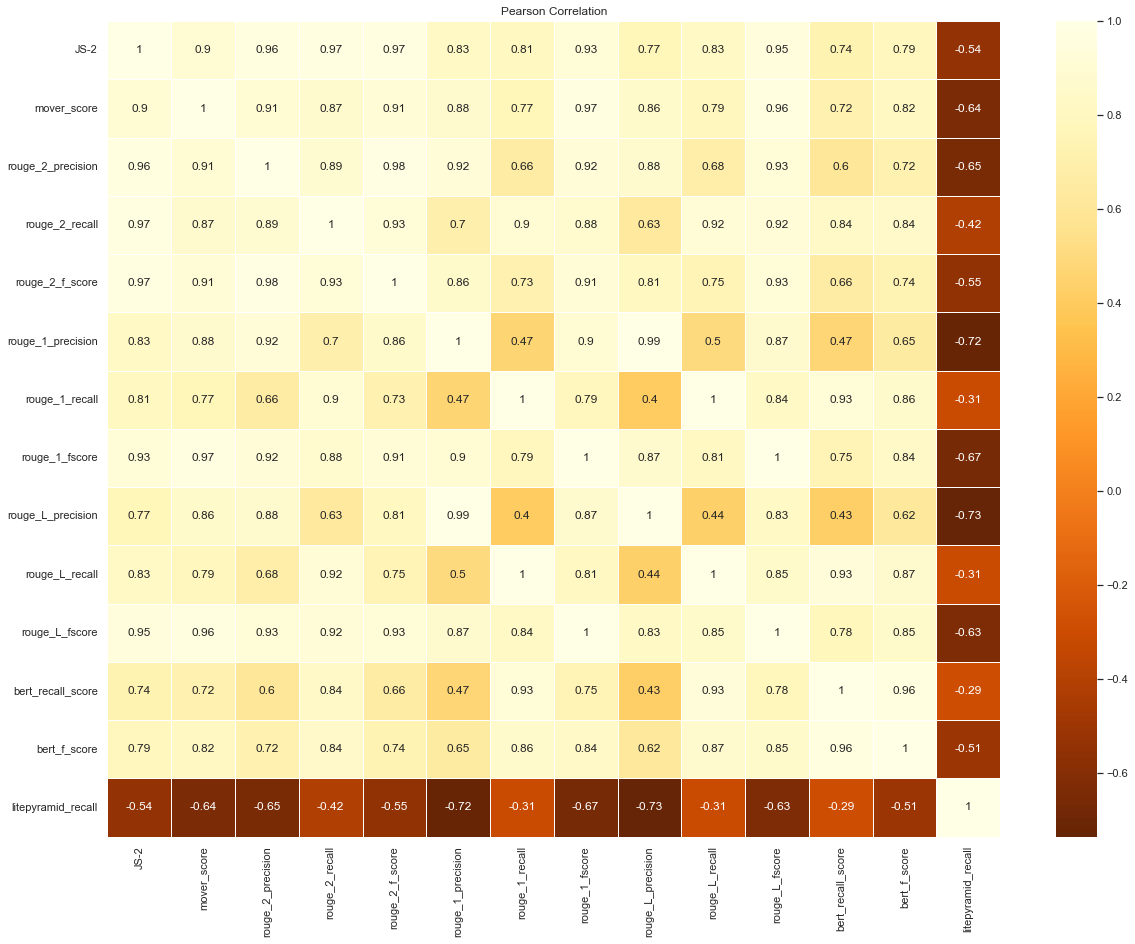

In [183]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))
plt.title('Pearson Correlation')
sns.set_theme()
ax = sns.heatmap(df.corr(method='pearson'),linewidths=1.0,annot=True,cmap="YlOrBr_r")
plt.savefig('Pearson Heatmap.png')

In [184]:
Scorr=df.corr(method='spearman')

In [185]:
Scorr

,JS-2,mover_score,rouge_2_precision,rouge_2_recall,rouge_2_f_score,rouge_1_precision,rouge_1_recall,rouge_1_fscore,rouge_L_precision,rouge_L_recall,rouge_L_fscore,bert_recall_score,bert_f_score,litepyramid_recall
JS-2,1.000000,0.883333,0.866667,0.916667,0.966667,0.733333,0.850000,0.883333,0.733333,0.850000,0.883333,0.766667,0.750000,-0.533367
mover_score,0.883333,1.000000,0.933333,0.850000,0.966667,0.866667,0.816667,0.966667,0.866667,0.816667,0.966667,0.783333,0.783333,-0.743216
rouge_2_precision,0.866667,0.933333,1.000000,0.766667,0.933333,0.950000,0.733333,0.950000,0.950000,0.733333,0.950000,0.633333,0.666667,-0.839397
rouge_2_recall,0.916667,0.850000,0.766667,1.000000,0.900000,0.683333,0.983333,0.883333,0.683333,0.983333,0.883333,0.933333,0.916667,-0.472161
rouge_2_f_score,0.966667,0.966667,0.933333,0.900000,1.000000,0.816667,0.850000,0.950000,0.816667,0.850000,0.950000,0.766667,0.783333,-0.673266
rouge_1_precision,0.733333,0.866667,0.950000,0.683333,0.816667,1.000000,0.666667,0.900000,1.000000,0.666667,0.900000,0.616667,0.633333,-0.865628
rouge_1_recall,0.850000,0.816667,0.733333,0.983333,0.850000,0.666667,1.000000,0.866667,0.666667,1.000000,0.866667,0.950000,0.950000,-0.498392
rouge_1_fscore,0.883333,0.966667,0.950000,0.883333,0.950000,0.900000,0.866667,1.000000,0.900000,0.866667,1.000000,0.800000,0.783333,-0.751960
rouge_L_precision,0.733333,0.866667,0.950000,0.683333,0.816667,1.000000,0.666667,0.900000,1.000000,0.666667,0.900000,0.616667,0.633333,-0.865628
rouge_L_recall,0.850000,0.816667,0.733333,0.983333,0.850000,0.666667,1.000000,0.866667,0.666667,1.000000,0.866667,0.950000,0.950000,-0.498392


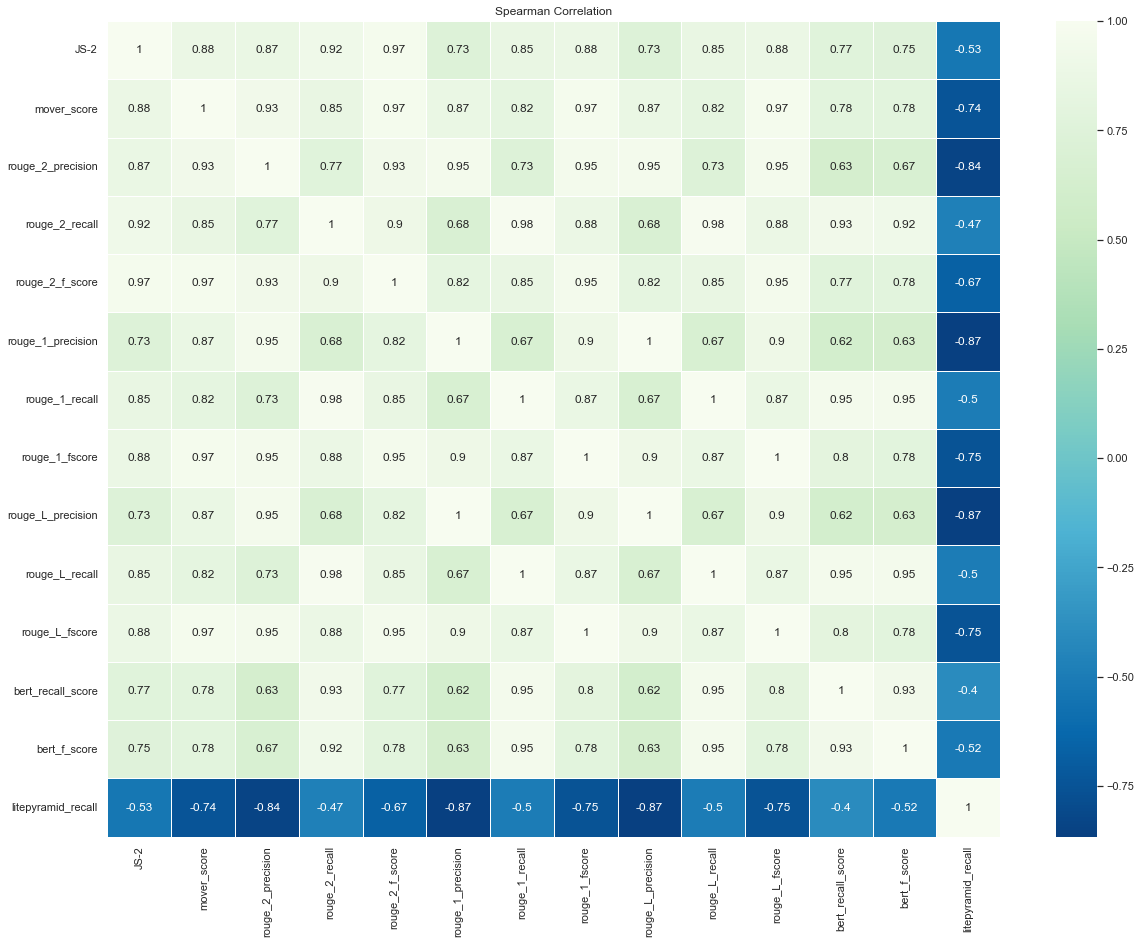

In [187]:
plt.figure(figsize = (20,15))
plt.title('Spearman Correlation')
sns.set_theme()
ax = sns.heatmap(df.corr(method='spearman'),linewidths=.5,cmap="GnBu_r",annot=True)
plt.savefig('Spearman Heatmap.png')

In [188]:
df.corr(method='kendall')

,JS-2,mover_score,rouge_2_precision,rouge_2_recall,rouge_2_f_score,rouge_1_precision,rouge_1_recall,rouge_1_fscore,rouge_L_precision,rouge_L_recall,rouge_L_fscore,bert_recall_score,bert_f_score,litepyramid_recall
JS-2,1.000000,0.777778,0.722222,0.777778,0.888889,0.555556,0.722222,0.777778,0.555556,0.722222,0.777778,0.611111,0.555556,-0.464238
mover_score,0.777778,1.000000,0.833333,0.666667,0.888889,0.666667,0.611111,0.888889,0.666667,0.611111,0.888889,0.611111,0.555556,-0.588035
rouge_2_precision,0.722222,0.833333,1.000000,0.611111,0.833333,0.833333,0.555556,0.833333,0.833333,0.555556,0.833333,0.444444,0.388889,-0.711832
rouge_2_recall,0.777778,0.666667,0.611111,1.000000,0.777778,0.555556,0.944444,0.777778,0.555556,0.944444,0.777778,0.833333,0.777778,-0.402340
rouge_2_f_score,0.888889,0.888889,0.833333,0.777778,1.000000,0.666667,0.722222,0.888889,0.666667,0.722222,0.888889,0.611111,0.555556,-0.588035
rouge_1_precision,0.555556,0.666667,0.833333,0.555556,0.666667,1.000000,0.500000,0.777778,1.000000,0.500000,0.777778,0.388889,0.444444,-0.711832
rouge_1_recall,0.722222,0.611111,0.555556,0.944444,0.722222,0.500000,1.000000,0.722222,0.500000,1.000000,0.722222,0.888889,0.833333,-0.464238
rouge_1_fscore,0.777778,0.888889,0.833333,0.777778,0.888889,0.777778,0.722222,1.000000,0.777778,0.722222,1.000000,0.611111,0.555556,-0.588035
rouge_L_precision,0.555556,0.666667,0.833333,0.555556,0.666667,1.000000,0.500000,0.777778,1.000000,0.500000,0.777778,0.388889,0.444444,-0.711832
rouge_L_recall,0.722222,0.611111,0.555556,0.944444,0.722222,0.500000,1.000000,0.722222,0.500000,1.000000,0.722222,0.888889,0.833333,-0.464238


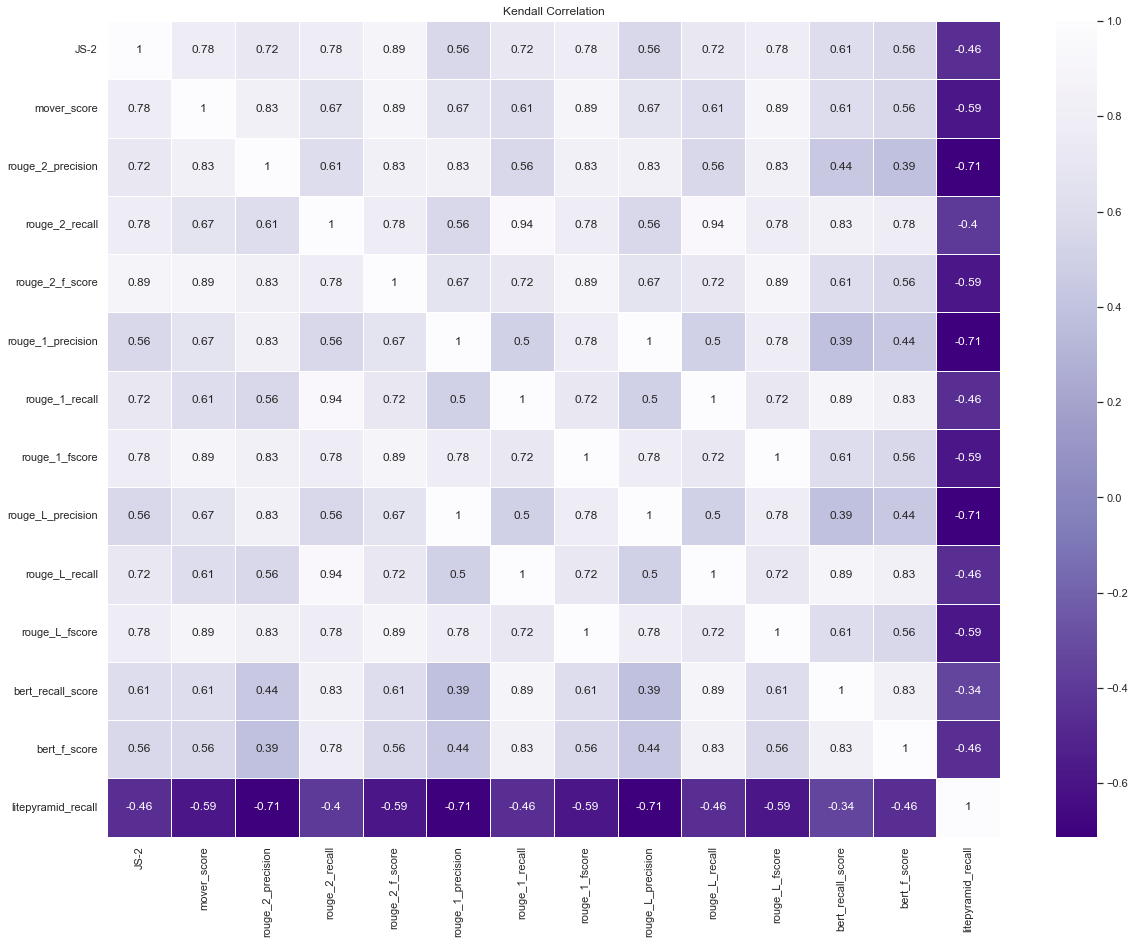

In [189]:
plt.figure(figsize = (20,15))
plt.title('Kendall Correlation')
sns.set_theme()
ax = sns.heatmap(df.corr(method='kendall'),linewidths=.5,cmap="Purples_r",annot=True)
plt.savefig('Kendall Heatmap.png')

In [190]:
import pandas as pd
df=pd.read_excel("./William's Significance test.xlsx")

In [191]:
df

,Metric,JS-2,Mover Score,Rouge 1,Rouge L,Rouge 2,Bert Score
0,JS-2,0.000000,0.004762,1.638996e-05,5.149946e-04,0.816340,0.563911
1,Mover Score,0.004762,0.000000,1.778179e-01,5.625212e-01,0.004188,0.006666
2,Rouge 1,0.000016,0.177818,0.000000e+00,4.639513e-08,0.000167,0.000356
3,Rouge L,0.000515,0.562521,4.639513e-08,0.000000e+00,0.006593,0.006366
4,Rouge 2,0.816340,0.004188,1.671007e-04,6.592591e-03,0.000000,0.545614
5,Bert Score,0.563911,0.006666,3.555535e-04,6.366301e-03,0.545614,0.000000


In [192]:
df=df.drop(columns=['Metric'])

In [193]:
df

,JS-2,Mover Score,Rouge 1,Rouge L,Rouge 2,Bert Score
0,0.000000,0.004762,1.638996e-05,5.149946e-04,0.816340,0.563911
1,0.004762,0.000000,1.778179e-01,5.625212e-01,0.004188,0.006666
2,0.000016,0.177818,0.000000e+00,4.639513e-08,0.000167,0.000356
3,0.000515,0.562521,4.639513e-08,0.000000e+00,0.006593,0.006366
4,0.816340,0.004188,1.671007e-04,6.592591e-03,0.000000,0.545614
5,0.563911,0.006666,3.555535e-04,6.366301e-03,0.545614,0.000000


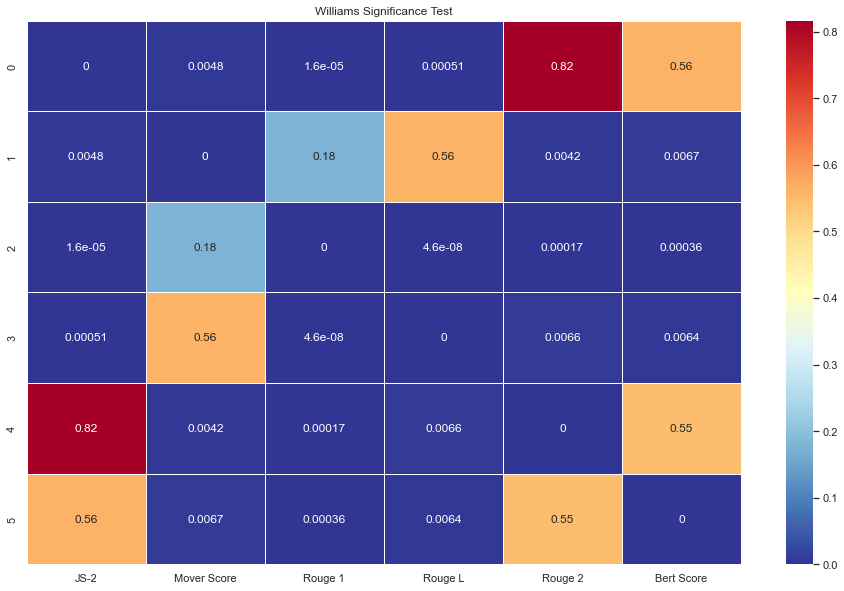

In [195]:
plt.figure(figsize = (16,10))
plt.title('Williams Significance Test' )
sns.set()
ax = sns.heatmap(df,linewidths=.5,annot=True, cmap="RdYlBu_r")
plt.savefig('William Test Heatmap.png')